# Tomographie à rayons X


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import rotate, resize
from scipy.integrate import quad

On commence par charger une image synthétique (le "Shepp-Logan phantom") dont on fixe la taille à 256 x 256 pixels. Le Shepp-Logan phantom est une image de test standard créée par Larry Shepp et Benjamin F. Logan en 1974et qui sert de modèle d'acquisition d'une tête humaine dans le développement et le test d'algorithmes de reconstruction d'images.

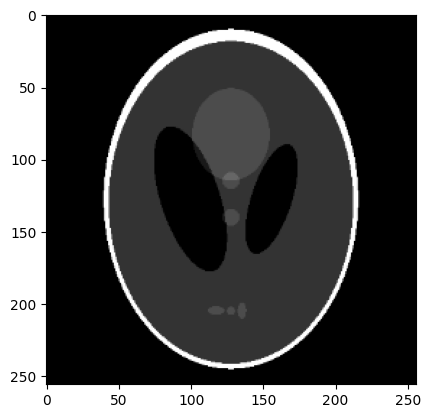

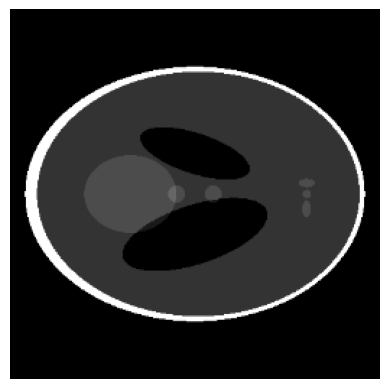

(256, 256)
(256, 256)


In [21]:
# Load the image
N = 256
image = shepp_logan_phantom()
image = resize(image, (N, N), anti_aliasing=True)
rotated_image = rotate(image, 90)  
#plt.imshow(rotated_image, cmap='gray')
plt.imshow(image, cmap='gray')     
plt.figure()
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()
print(image.shape)
print(rotated_image.shape)


## 1. Transformée de Radon

**En utilisant la fonction *rotate* de scikit-image, implémenter une fonction permettant de calculer la transformée de Radon d'une image, appelée également sinogramme de l'image.**

Pour un angle donné, on peut calculer la transformée de Radon de l'image en appliquant une rotation à l'image dans le sens inverse des aiguilles d'une montre et en sommant la valeur des pixels de l'image obtenue après rotation ligne par ligne.

In [22]:
matrice = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

somme_lignes = np.sum(matrice, axis=1)

print(somme_lignes)

[ 6 15 24]


In [66]:
def radon_transform(image, theta):
  
  """
  Computes the Radon transform of the image
  
  Parameters
  ----------
  
  image: 2D numpy array
    input image
    
  theta: 1D numpy array
    angles (specified in degrees)
  
  Return
  ------
  
  out: numpy array
    Radon transform (sinogram) of the input image
    
  """
  sinogram = []    #avant c'était une constante, on retourne la liste des sinograms pour chaque angle
  for angle in theta:
    rotated_picture = rotate(image, angle)
    sinogram.append(np.mean(rotated_picture, axis=1))

  return sinogram



    
    #TODO: Implement the Radon transform

In [24]:
#Je tente autre chose

N_t = 256      
angles_count = 180

theta = np.linspace(0., 180., angles_count, endpoint=False)   #pourquoi 180 angles différents si je veux juste faire une rotation, cela fait tout bugger???
sinogram = radon_transform(image, theta)

In [63]:
# Computes the Radon transform of the image 
# N_t = 256      
# angles_count = 180
# radon_transform_vectorized = np.vectorize(lambda x : radon_transform(image, x))
# theta = np.linspace(0., 180., angles_count, endpoint=False)   #pourquoi 180 angles différents si je veux juste faire une rotation, cela fait tout bugger???
# sinogram = radon_transform(theta)



array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.19757844e-01,
       9.99608061e-01, 1.00000000e+00, 1.00000000e+00, 6.24910414e-01,
       2.00000000e-01, 2.00000000e-01, 2.00000000e-01, 2.00000000e-01,
       2.00000000e-01, 2.00000000e-01, 2.00000000e-01, 2.00000000e-01,
       2.00000000e-01, 2.00000000e-01, 2.00000000e-01, 2.00000000e-01,
      

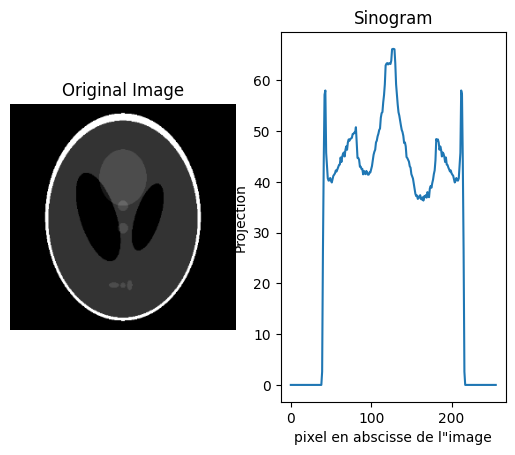

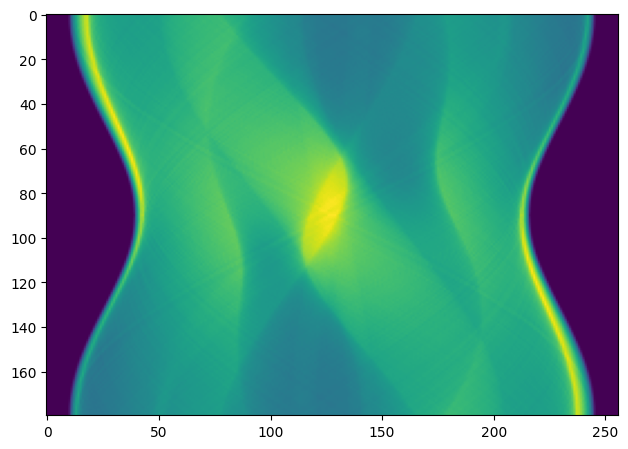

In [67]:
# Display the original image along with its sinogram
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image')

# Display the sinogram
plt.subplot(1, 2, 2)
plt.plot(sinogram[90])
plt.xlabel('pixel en abscisse de l"image')
plt.ylabel('Projection')
plt.title('Sinogram')

plt.figure()
plt.imshow(sinogram)

plt.tight_layout()
plt.show()




Montrons pour tout $\theta$ dans $[0, 2\pi]$ et pour tout $w \in \mathbb{R}$ l'égalité proposée par l'énoncé.

Tout d'abord, 

$ Ff(\omega cos(\theta), \omega sin(\theta)) = \int_{\mathbb{R^2}} f(x, y)\exp(-i(\omega cos(\theta) + \omega sin(\theta))) \, dxdy $

Par ailleur
$FRf(\theta, .)(w) = \int_{\mathbb{R^2}} f(t cos(\theta) - \rho sin(\theta), t sin(\theta) + \rho(\th coseta))\exp(-i(\omega cos(\theta) + \omega sin(\theta))) \, dtd\rho $

On identifie alors le changement de variable à faire caractérisé par l'équation matricielle suivante:

$ \begin{pmatrix}
x \\
y \\
\end{pmatrix}  =  \begin{pmatrix}
                    cos(\theta) & -sin(\theta)\\
                    sin(\theta) & cos(\theta)\\
                    \end{pmatrix}\begin{pmatrix}
                                t \\
                                 \rho\\
                                \end{pmatrix}$


On remarque que cette matrice est la jacobienne de la fonction de changement de variable et qu'elle représente une rotation, elle admet donc un déterminant unitaire et le changement de variable n'a donc pas de propriété de dilatation, en appliquant le changement de variable, on remplace par manipulation des équations que

$ t = cos(\theta ) x + sin(\theta) y$

on obtient ainsi l'égalité suivante:

$ Ff(\omega cos(\theta), \omega sin(\theta)) = FRf(\theta, .)(w)$









## 2. Rétroprojection

**Implémenter la reconstruction de l'image tomographique à partir du sinogramme par rétro-projection. Commenter le résultat.**

In [68]:
def backproj(g, N_t, angles_count):
  s = 0
  reconstructed = np.zeros((N_t, N_t))
  #on réalise un moyenne sur toutes les mesures de la transformée de Radon
  for x in range(N_t):
    for y in range(N_t):
      for i in range (angles_count):
        t = int((x - N_t//2)*np.cos(theta[i]) + (y - N_t//2)*np.sin(theta[i]))
        n = N_t
        if N_t//2 + t < N_t and N_t//2 + t >= 0:
          n -= 1
          s += g[i][(N_t//2) + t]
      s /= n
      reconstructed[x, y] = s
      

  return reconstructed
    # TODO: Retro-projection implementation

In [69]:
# Backprojection of the sinogram
f = backproj(sinogram, N_t, angles_count)

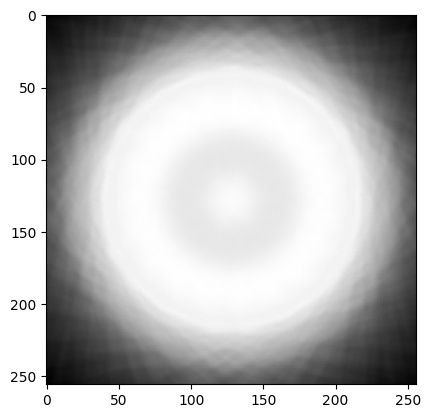

In [70]:
# Display the result
plt.imshow(f, cmap='gray')

##  3. Rétro-projection filtrée

**Appliquer un filtrage adapté au sinogramme avant de rétro-projeter. Afficher le sinogramme filtré ainsi que le résultat de la reconstruction.**


In [ ]:
def filter_sinogram(sinogram, N_t):

    """
    Filter the sinogram
    
    Parameters
    ----------
    
    sinogram: numpy array
      sinogram
    N_t: int
      number of projection positions
      
    Return
    ------
    
    reconstructed: N_t x angle_counts numpy array
      reconstructed sinogram
    """
    
    # TODO: implement the filtering

In [ ]:
filtered_sinogram = filter_sinogram(sinogram, N_t)

In [ ]:
# Display the sinogram and the filtered sinogram

In [ ]:
# Filtered backpropagation
frec = backproj(filtered_sinogram, N_t, angles_count, N)

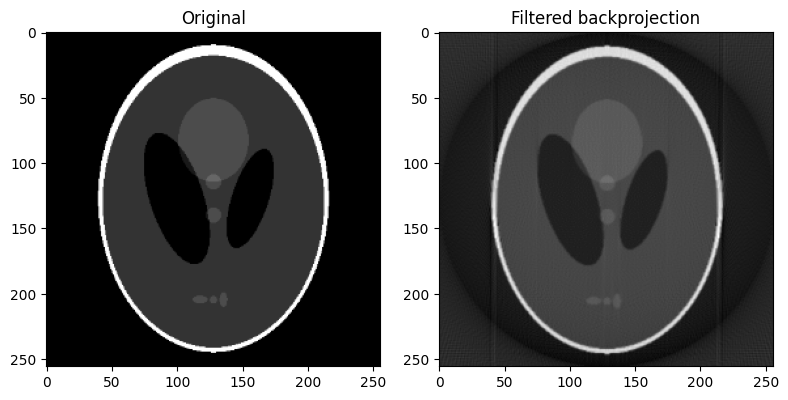

In [ ]:
# Display the reconstructed and the original images